In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed(42)
sns.set_style('whitegrid')
sns.set_palette('muted')

In [2]:
train_df = pd.read_csv('data/train/train.csv', delimiter=',');
test_df = pd.read_csv('data/test/test.csv', delimiter=',');

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [8]:
train_df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


## Zmienne
__Employee ID__: Unikalny identyfikator przypisany do każdego pracownika. \
__Age__: Wiek pracownika, w zakresie od 18 do 60 lat. \
__Gender__: Płeć pracownika. \
__Years at Company__: Liczba lat, które pracownik przepracował w firmie. \
__Monthly Income__: Miesięczna pensja pracownika, w dolara
__Overtime__: Czy pracuje po godzinach (Tak lub Nie). \
__Number of Dependents__: Ilość członków rodziny (Żona/Mąż/Dzeci itp). \ch. \
__Job Role__: Dział lub rola, w której pracownik pracuje, zakodowana w kategorie takie jak Finanse, Opieka Zdrowotna, Technologia, Edukacja i Media. \
__Work-Life Balance__: Postrzegana przez pracownika równowaga między pracą a życiem prywatnym (Słaba, Poniżej Średniej, Dobra, Doskonała). \
__Job Satisfaction__: Zadowolenie pracownika z pracy: (Bardzo Niskie, Niskie, Średnie, Wysokie). \
__Performance Rating__: Ocena wydajności pracownika: (Niska, Poniżej Średniej, Średnia, Wysoka). \
__Number of Promotions__: Łączna liczba awansów, które otrzymał pracownik. \
__Distance from Home__: Odległość między domem a miejscem pracy pracownika, w milach. \
__Education Level__: Najwyższy poziom wykształcenia osiągnięty przez pracownika: (Liceum, Dyplom Associate, Licencjat, Magisterium, Doktorat). \
__Marital Status__: Stan cywilny pracownika: (Rozwiedziony, Żonaty, Singiel). \
__Job Level__: Poziom stanowiska pracownika: (Początkujący, Średni, Starszy). \
__Company Size__: Wielkość firmy, w której pracuje pracownik: (Mała, Średnia, Duża). \
__Company Tenure__: Łączna liczba lat, które pracownik przepracował w branży. \
__Remote Work__: Czy pracownik pracuje zdalnie: (Tak lub Nie). \
__Leadership Opportunities__: Czy pracownik ma możliwości przywódcze: (Tak lub Nie). \
__Innovation Opportunities__: Czy pracownik ma możliwości innowacji: (Tak lub Nie). \
__Company Reputation__: Postrzeganie reputacji firmy przez pracownika: (Bardzo Zła, Zła, Dobra, Doskonała). \
__Employee Recognition__: Poziom uznania, jaki otrzymuje pracownik: (Bardzo Niski, Nii, Średni, Wysoki). \

__Attrition__: Czy pracownik opuścił firmę, zakodowane jako 0 (pozostał) i 1 (opuścił).

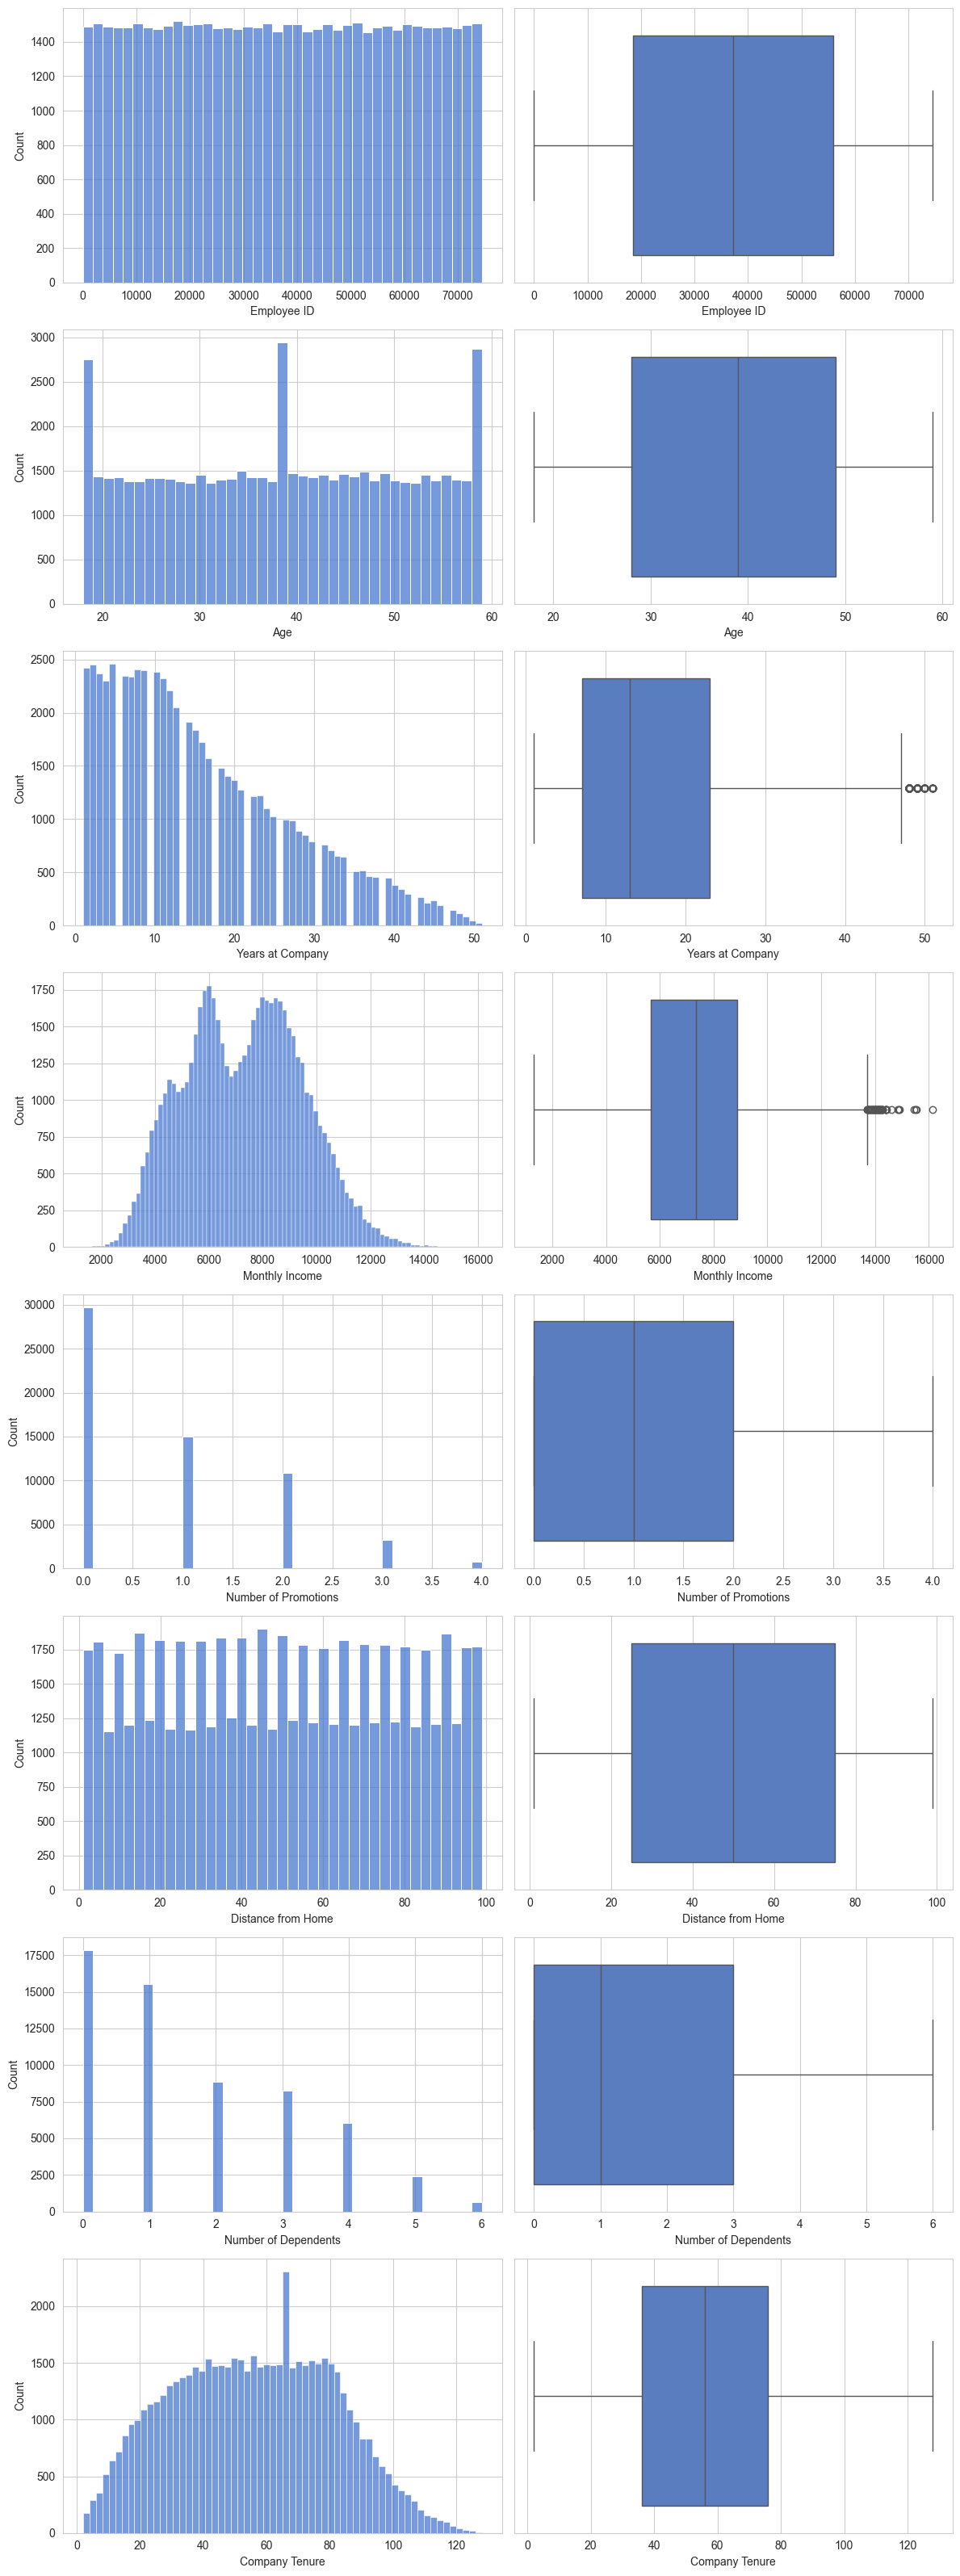

In [4]:
def plot_hist_and_box(df):
    # Filter only numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 4 * len(numeric_cols)))
    
    for i, col in enumerate(numeric_cols):
        # Plot histogram and boxplot
        sns.histplot(df[col], kde=False, ax=axes[i, 0])
        sns.boxplot(x=df[col], ax=axes[i, 1])
    
    plt.tight_layout()
    plt.show()

plot_hist_and_box(train_df)

## Zmienne
__Employee ID__: Unikalny identyfikator przypisany do każdego pracownika. \
__Age__: Wiek pracownika, w zakresie od 18 do 60 lat. \
__Gender__: Płeć pracownika. \
__Years at Company__: Liczba lat, które pracownik przepracował w firmie. \
__Monthly Income__: Miesięczna pensja pracownika, w dolarach. \
__Overtime__: Czy pracuje po godzinach (Tak lub Nie). \
__Number of Dependents__: Ilość członków rodziny (Żona/Mąż/Dzeci itp). \
__Job Role__: Dział lub rola, w której pracownik pracuje, zakodowana w kategorie takie jak Finanse, Opieka Zdrowotna, Technologia, Edukacja i Media. \
__Work-Life Balance__: Postrzegana przez pracownika równowaga między pracą a życiem prywatnym (Słaba, Poniżej Średniej, Dobra, Doskonała). \
__Job Satisfaction__: Zadowolenie pracownika z pracy: (Bardzo Niskie, Niskie, Średnie, Wysokie). \
__Performance Rating__: Ocena wydajności pracownika: (Niska, Poniżej Średniej, Średnia, Wysoka). \
__Number of Promotions__: Łączna liczba awansów, które otrzymał pracownik. \
__Distance from Home__: Odległość między domem a miejscem pracy pracownika, w milach. \
__Education Level__: Najwyższy poziom wykształcenia osiągnięty przez pracownika: (Liceum, Dyplom Associate, Licencjat, Magisterium, Doktorat). \
__Marital Status__: Stan cywilny pracownika: (Rozwiedziony, Żonaty, Singiel). \
__Job Level__: Poziom stanowiska pracownika: (Początkujący, Średni, Starszy). \
__Company Size__: Wielkość firmy, w której pracuje pracownik: (Mała, Średnia, Duża). \
__Company Tenure__: Łączna liczba lat, które pracownik przepracował w branży. \
__Remote Work__: Czy pracownik pracuje zdalnie: (Tak lub Nie). \
__Leadership Opportunities__: Czy pracownik ma możliwości przywódcze: (Tak lub Nie). \
__Innovation Opportunities__: Czy pracownik ma możliwości innowacji: (Tak lub Nie). \
__Company Reputation__: Postrzeganie reputacji firmy przez pracownika: (Bardzo Zła, Zła, Dobra, Doskonała). \
__Employee Recognition__: Poziom uznania, jaki otrzymuje pracownik: (Bardzo Niski, Niski, Średni, Wysoki).

__Attrition__: Czy pracownik opuścił firmę, zakodowane jako 0 (pozostał) i 1 (opuścił).

In [3]:
def process_data(train_df, test_df):
    cols_to_drop = ['Employee ID', 'Attrition']
    cols_to_scale = [
        'Age', 'Years at Company',
        'Monthly Income', 'Number of Promotions',
        'Distance from Home', 'Company Tenure', 'Number of Dependents'
    ]
    cols_to_en_oh = [
        'Job Role', 'Work-Life Balance',
        'Job Satisfaction', 'Performance Rating',
        'Marital Status', 'Education Level',
        'Job Level', 'Company Size', 'Company Reputation',
        'Employee Recognition'
    ]
    cols_to_en_ord = [
        'Remote Work', 'Overtime',
        'Leadership Opportunities',
        'Innovation Opportunities'
    ]
    scaler = StandardScaler()
    encoder = OneHotEncoder(handle_unknown='ignore')

    # ---- TRAIN DATA ---- #

    # Remove unusable columns
    X_train = train_df.drop(columns=cols_to_drop)

    # Scale numeric columns
    X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

    # One hot encoding of selected categories
    encoded_array = encoder.fit_transform(X_train[cols_to_en_oh]).toarray()
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_to_en_oh))
    X_train = pd.concat([X_train.drop(columns=cols_to_en_oh), encoded_df], axis=1)

    # Oridnal encoding 
    X_train['Gender'] = X_train['Gender'].map({'Male': 0, 'Female': 1})
    X_train[cols_to_en_ord] = X_train[cols_to_en_ord].apply(lambda col: col.map({'No': 0, 'Yes': 1}))

    # Target variable
    y_train = train_df['Attrition'].map({'Stayed': 0, 'Left': 1})

    # ---- TEST DATA ---- #

    # Remove unusable columns
    X_test = test_df.drop(columns=cols_to_drop)

    # Scale numeric columns
    X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

    # One hot encoding of selected categories
    encoded_array = encoder.transform(X_test[cols_to_en_oh]).toarray()
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_to_en_oh))
    X_test = pd.concat([X_test.drop(columns=cols_to_en_oh), encoded_df], axis=1)

    # Oridnal encoding 
    X_test['Gender'] = X_test['Gender'].map({'Male': 0, 'Female': 1})
    X_test[cols_to_en_ord] = X_test[cols_to_en_ord].apply(lambda col: col.map({'No': 0, 'Yes': 1}))

    # Target variable
    y_test = test_df['Attrition'].map({'Stayed': 0, 'Left': 1})

    return X_train, y_train, X_test, y_test, scaler, encoder


X_train, y_train, X_test, y_test, scaler, encoder = process_data(train_df, test_df)
print(X_train.shape)
print(X_test.shape)

y_train.value_counts()

(59598, 51)
(14900, 51)


Attrition
0    31260
1    28338
Name: count, dtype: int64

## Model Selection

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    verbose=2, 
    n_jobs=-1
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# best one: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


## Best Model Training

In [17]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=5,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      7868
           1       0.74      0.73      0.73      7032

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



## Feature Impact with SHAPley Values and Game Theory

In [20]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
instance = X_test.iloc[[1]]

shap_values = explainer.shap_values(instance)

# SHAP values for the specific class (replace 0 with the desired class index)
class_index = 1
shap_values_class = shap_values[..., class_index]

# Convert to a DataFrame
shap_df = pd.DataFrame({
    "Feature": instance.columns,  # Feature names
    "SHAP Value": shap_values_class.flatten(),  # Corresponding SHAP values
    "Feature Value": instance.values.flatten()  # Values of features for this instance
})

# Sort by absolute SHAP value to see the most influential features first
shap_df = shap_df.reindex(shap_df["SHAP Value"].abs().sort_values(ascending=False).index)

# Visualize SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[..., 1], instance)

## Save the model

In [12]:
from joblib import dump, load
# Save the model
dump(model, 'release/model_PROD.joblib')
dump(scaler, 'release/0/scaler.joblib')
dump(encoder, 'release/0/encoder.joblib')

['release/0/encoder.joblib']